<div style="background-color: ##000080;font-weight:bold;font-family:segoe ui;font-size:20px;color:white;padding:10px;line-height:1.3;text-align:left;border-radius: 10px;">
<div align="center">
Pós-graduação Lato Sensu em Ciência de Dados e Big Data - PUC MG
</div>

## Análise e Exploração dos Dados

In [1]:
# Carregando Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import percentile
import matplotlib

# Scaling variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder 

# Formatando impressão de Array Numpy
np.set_printoptions(precision=4, suppress=True)  

# Formatando impressão de numeros no Pandas
pd.set_option('display.float_format', lambda x: '%.4f' % x)  

%matplotlib inline

In [2]:
# Instalando Biblioteca de Visualização Sweetviz
!pip install sweetviz

In [3]:
import sweetviz as sv

In [4]:
# Carregando base ajustada na etapa de Tratamento a ser analisada
conf_df = pd.read_csv('tcc_conformidade_2.csv', dtype={'setor_cod': 'string',
                                                       'cnae_classe': 'string',
                                                       'situacao_cadastral': 'string',
                                                       'natureza_juridica': 'string',
                                                       'impacto': 'string'})

In [5]:
# Analizando o dataset
conf_report = sv.analyze(conf_df)

#Mostrando o Relatório
conf_report.show_html('Conformidade.html')


Report Conformidade.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



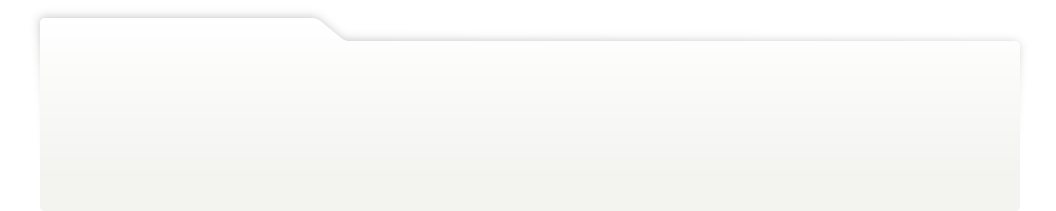
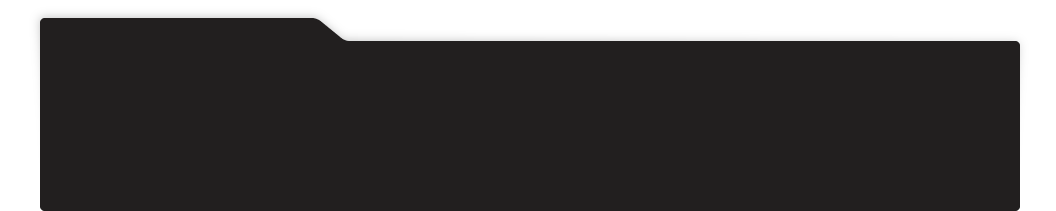
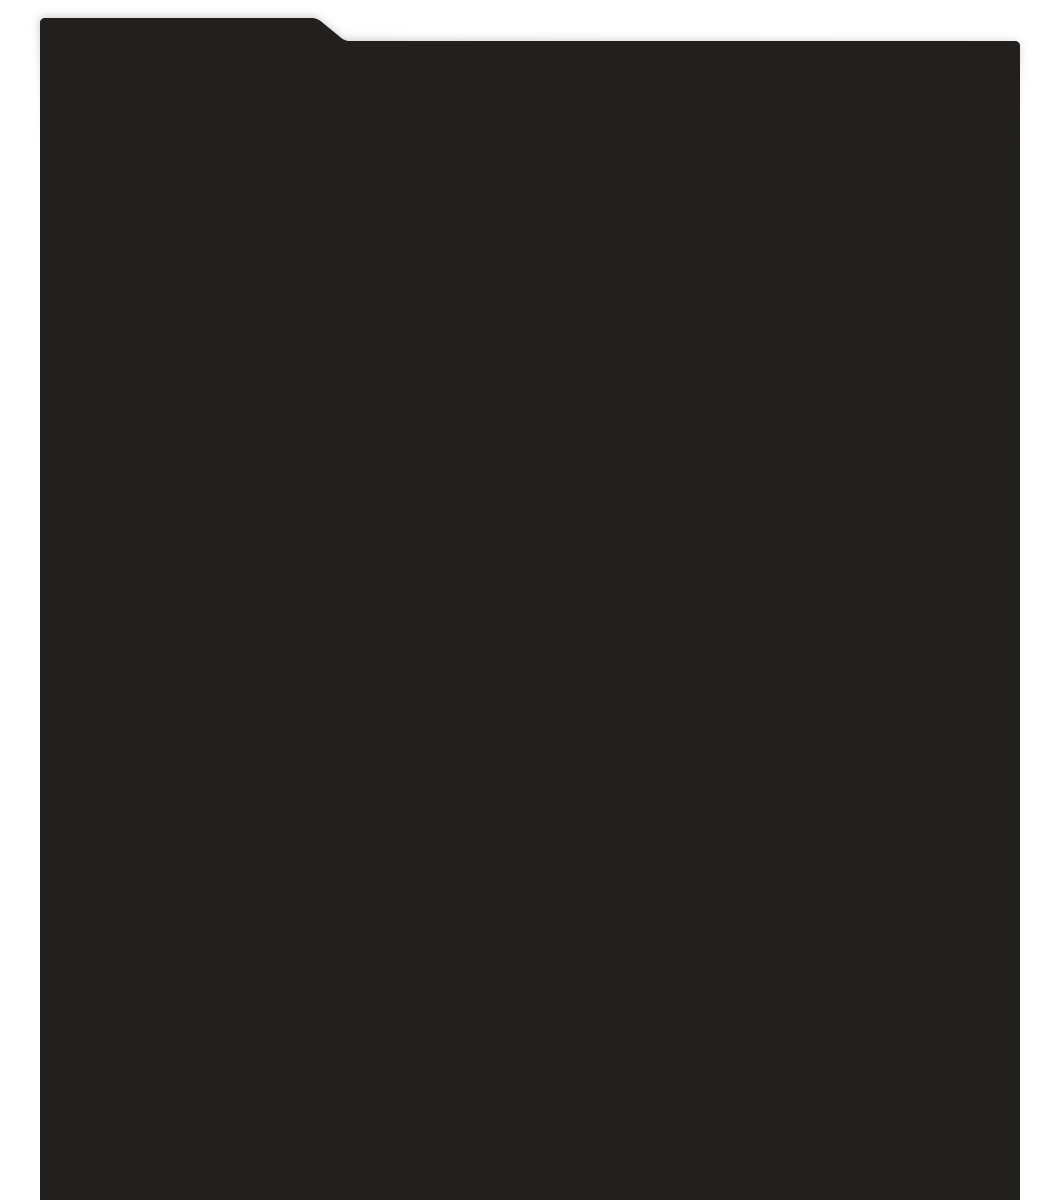
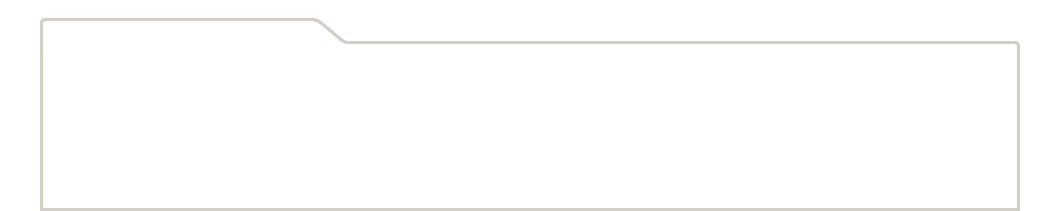
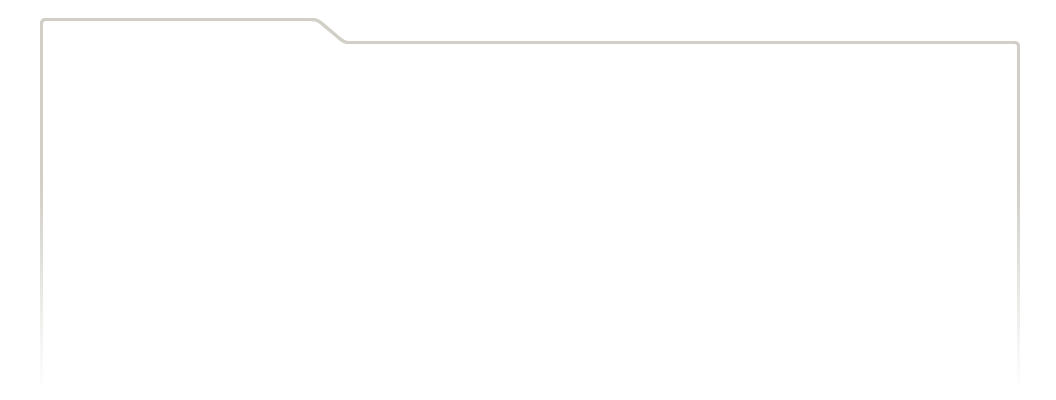
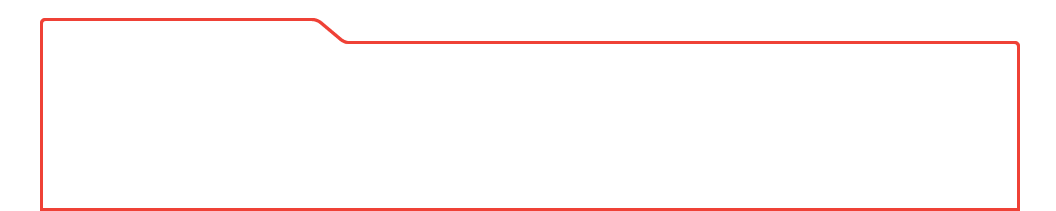
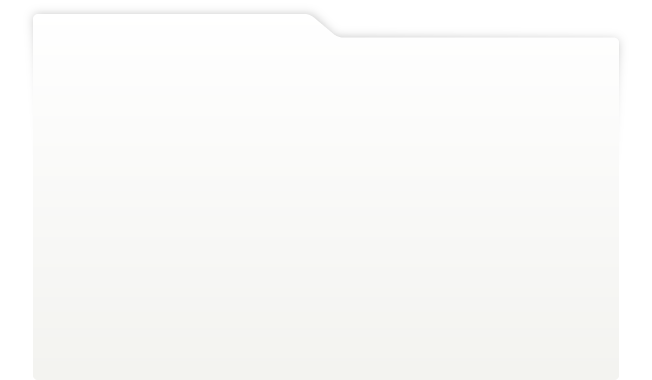
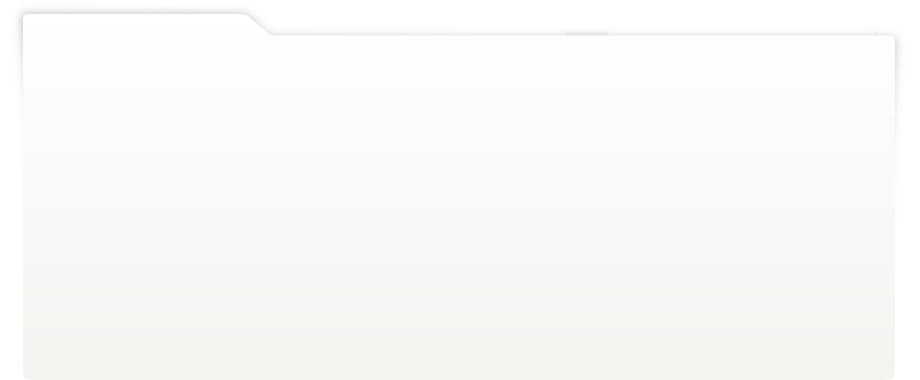
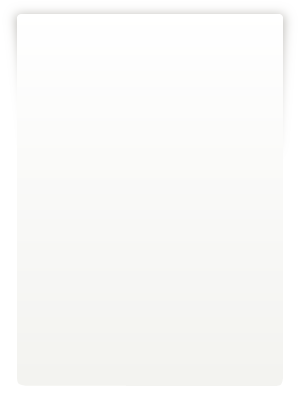
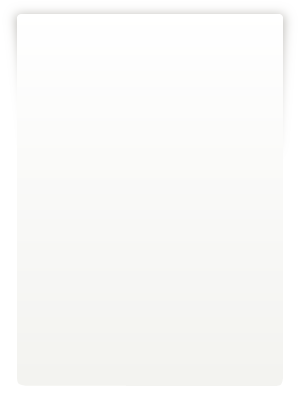
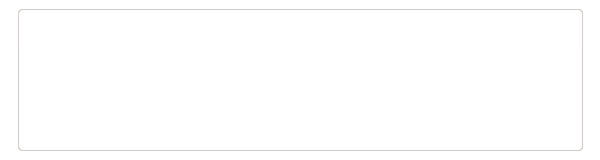
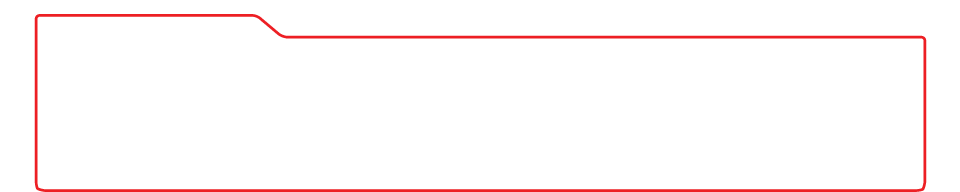
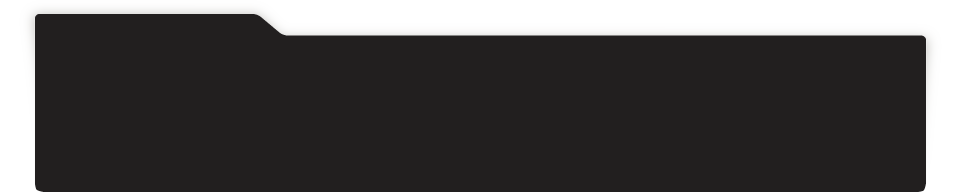
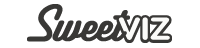
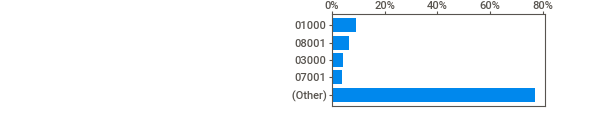
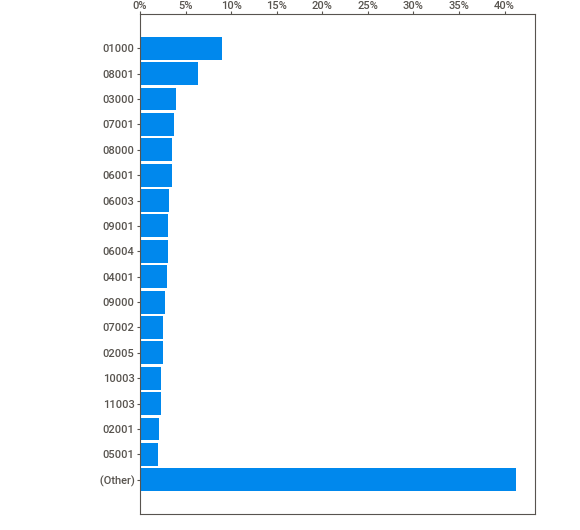
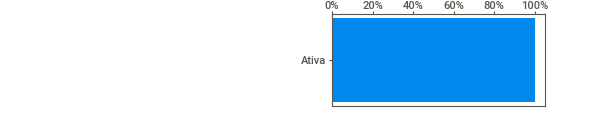
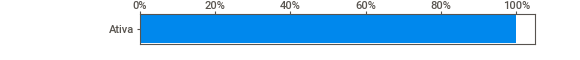
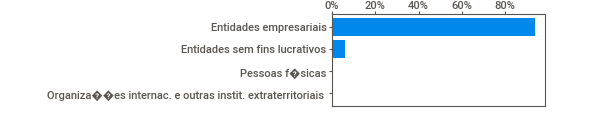
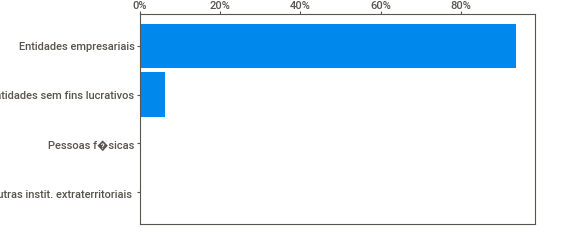
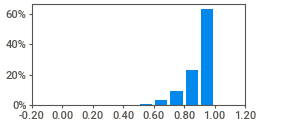
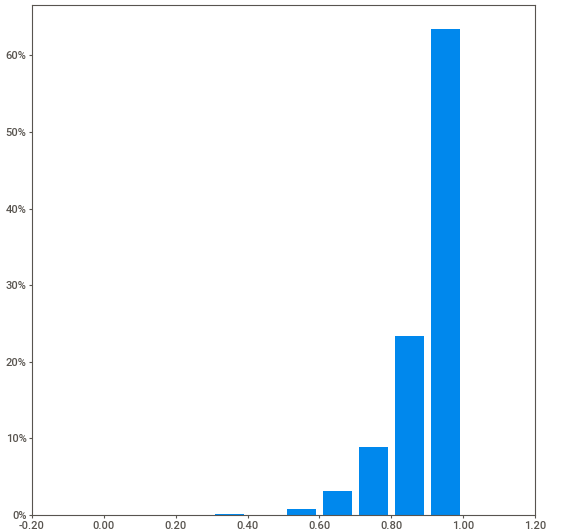
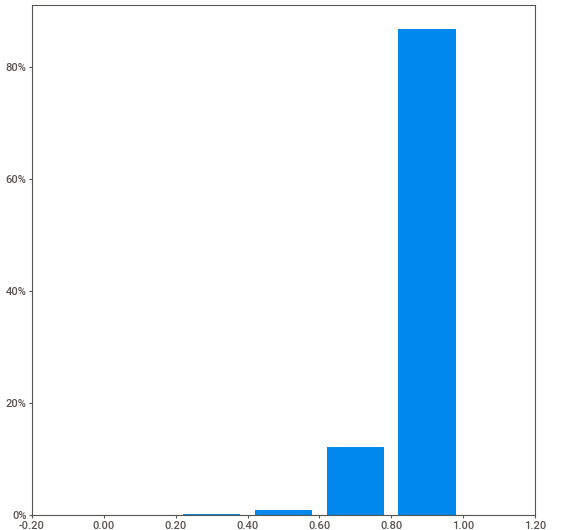
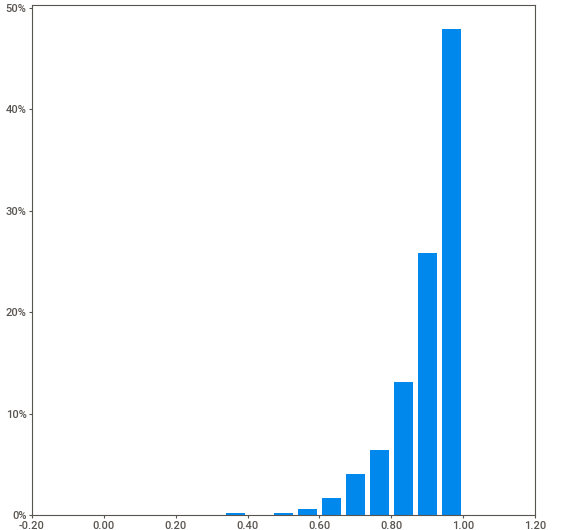
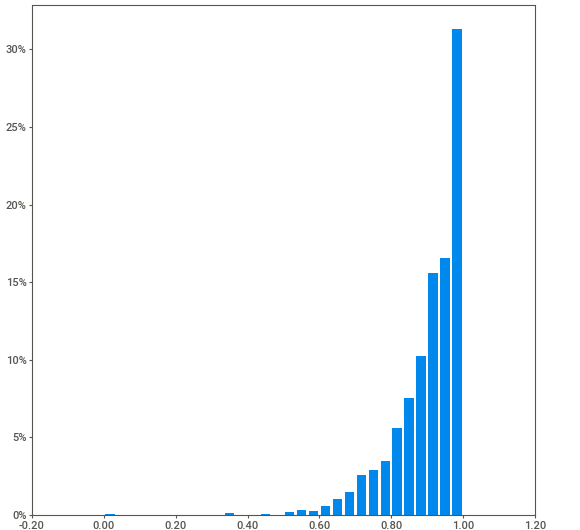
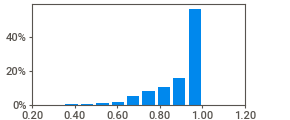
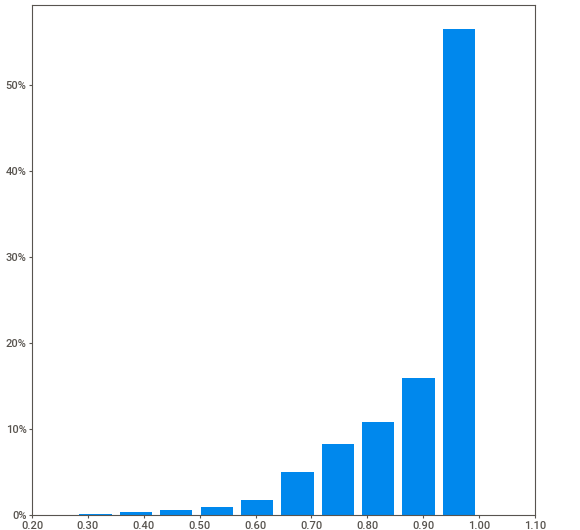
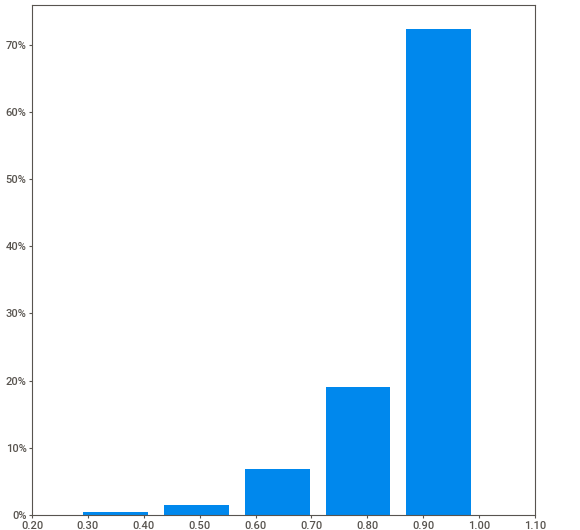
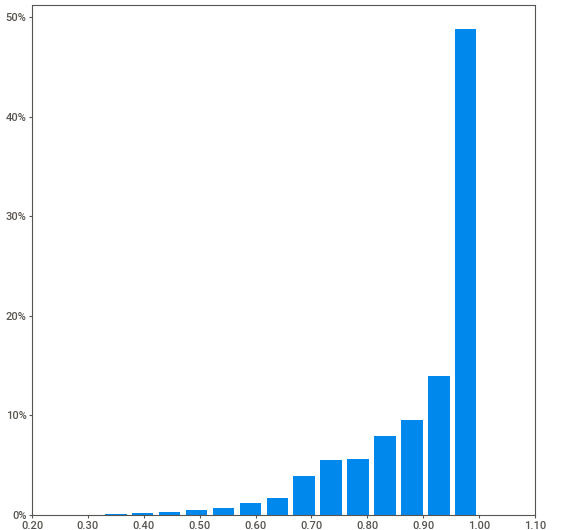
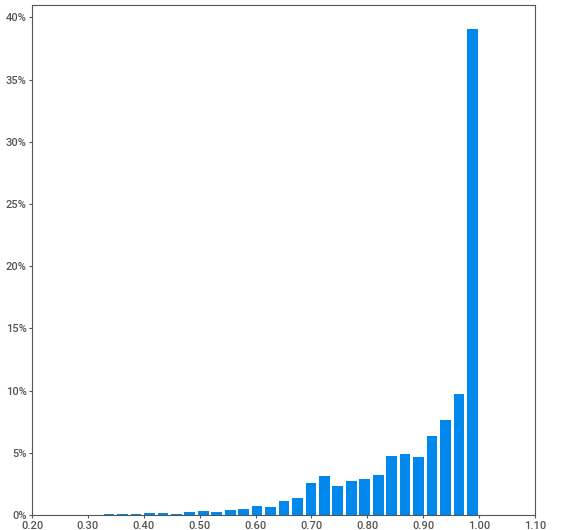
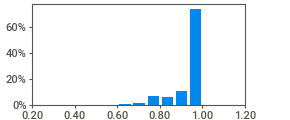
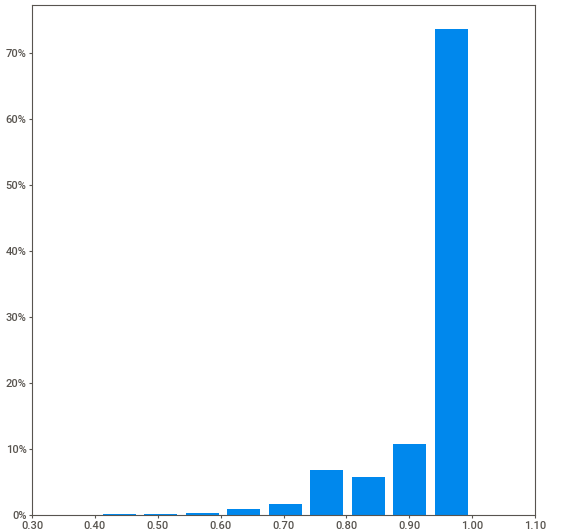
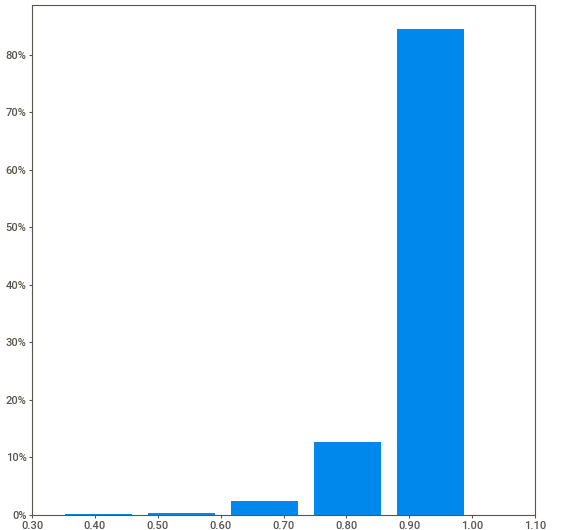
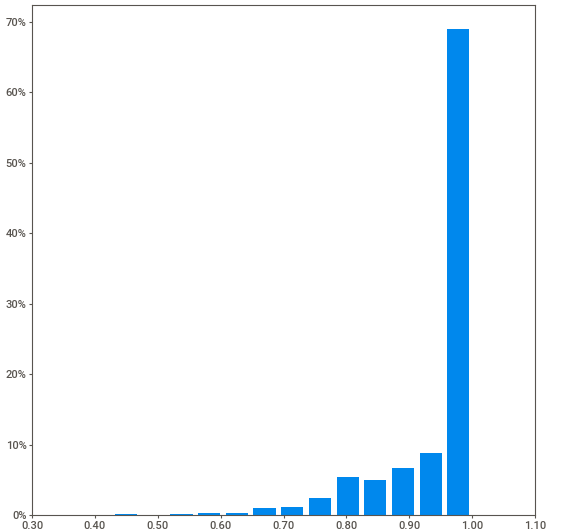
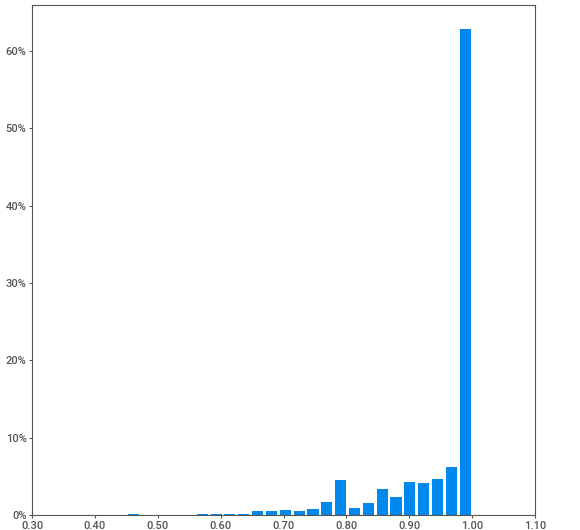
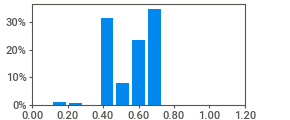
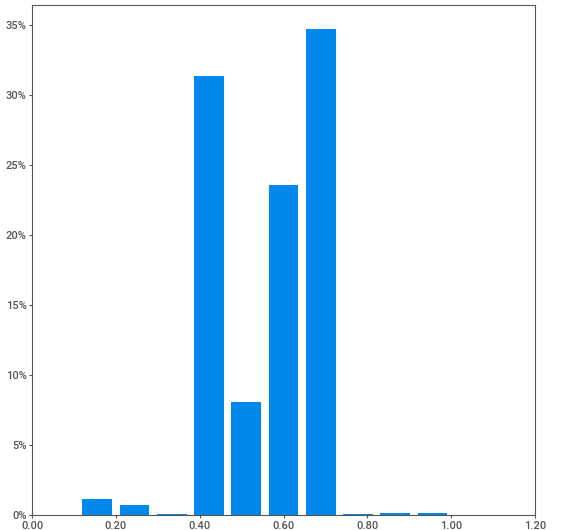
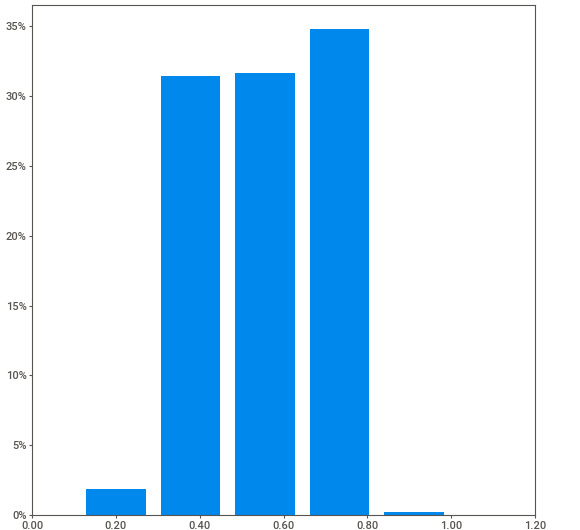
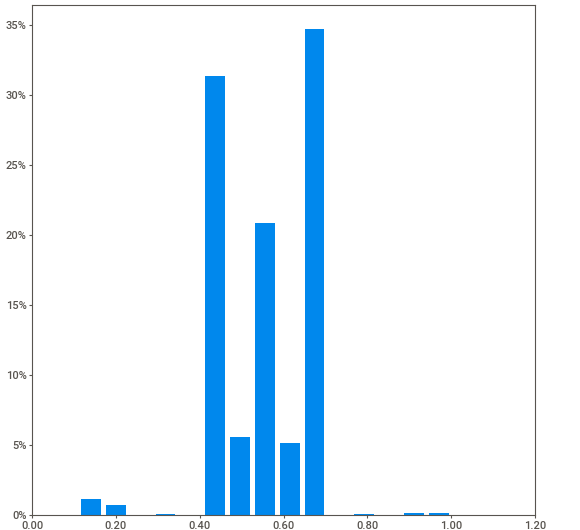
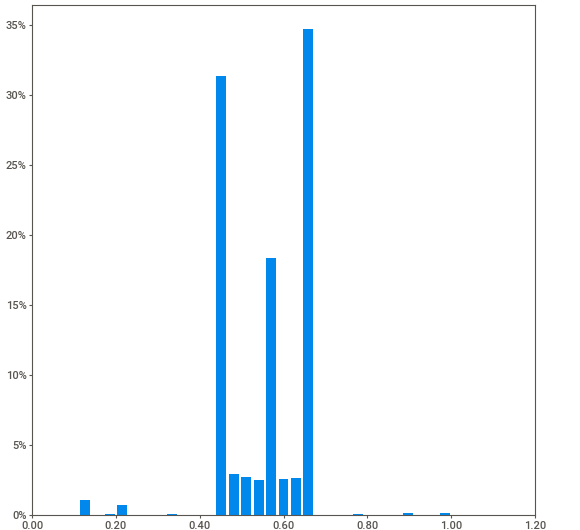
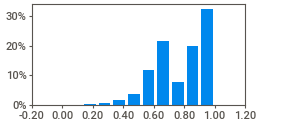
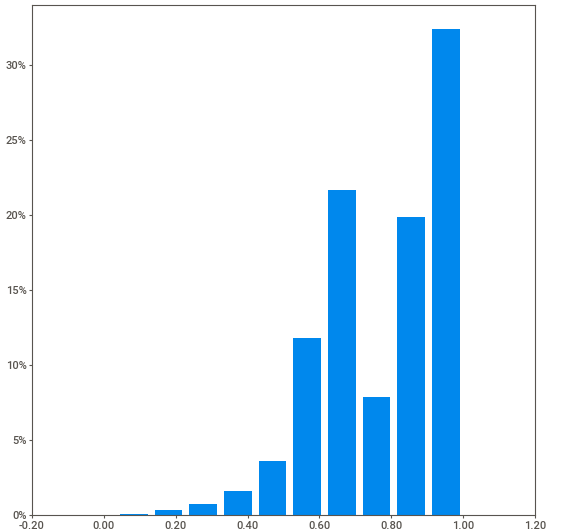
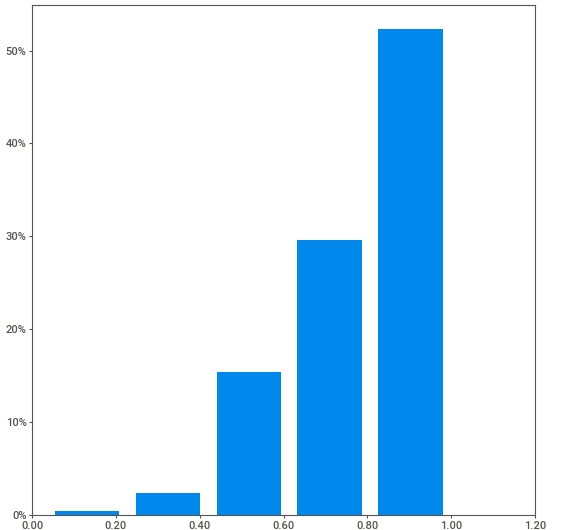
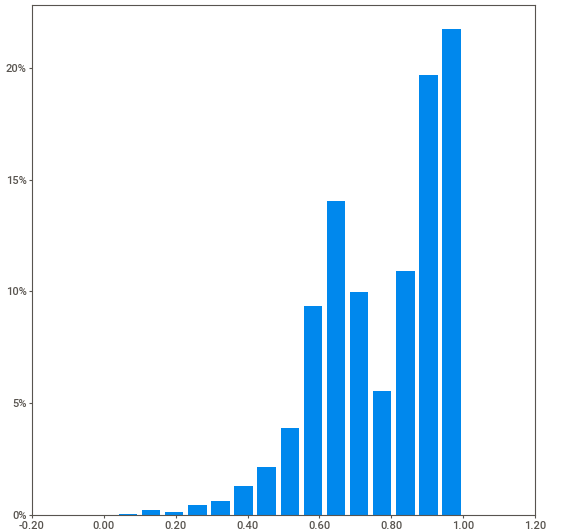
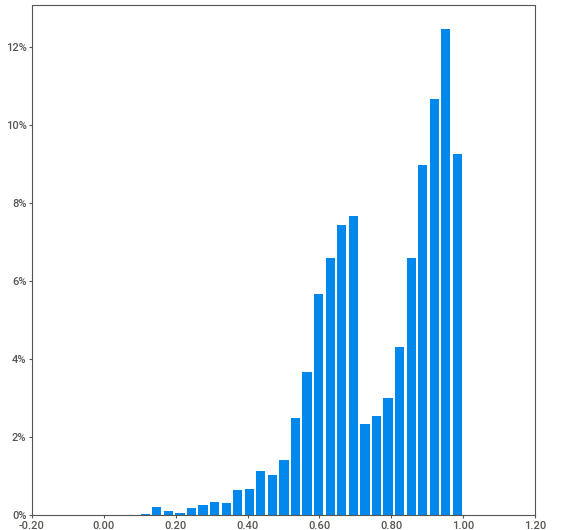
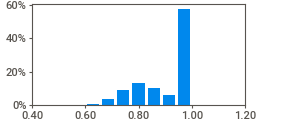
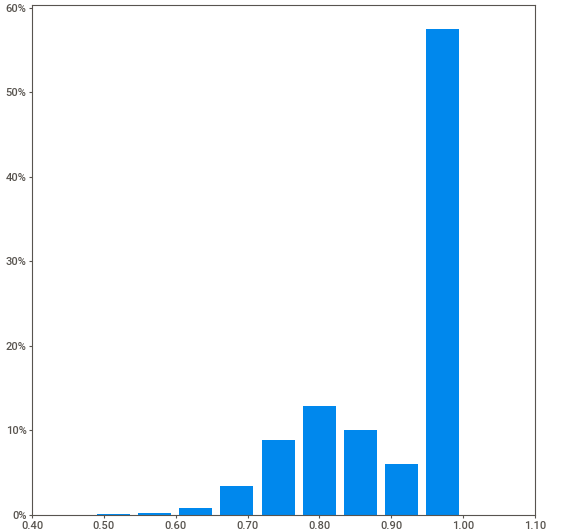
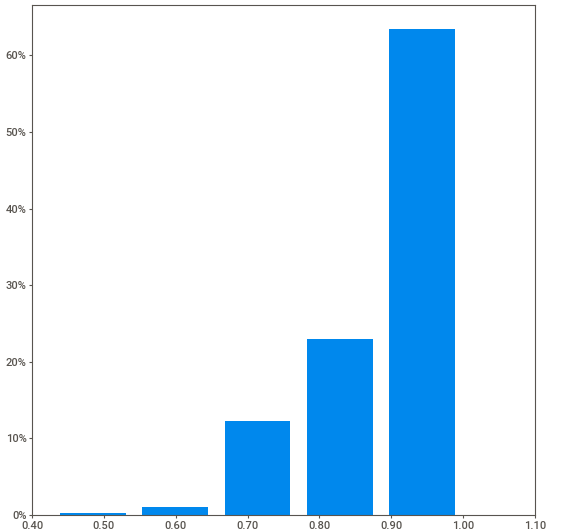
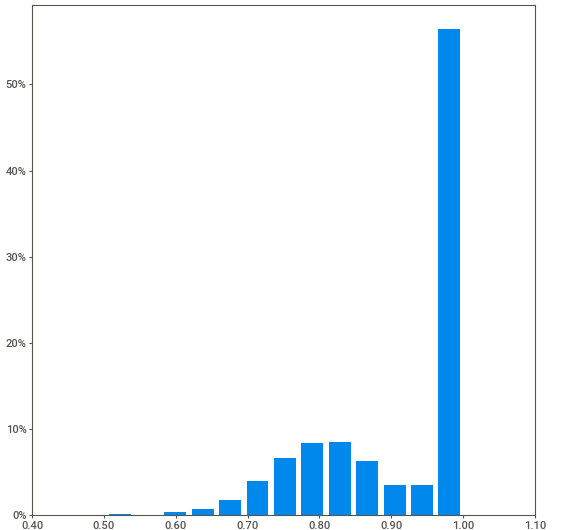
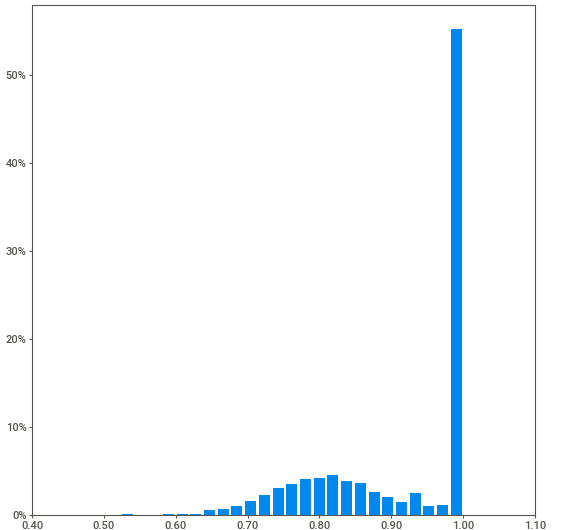
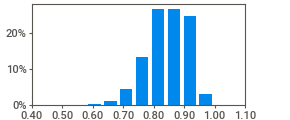
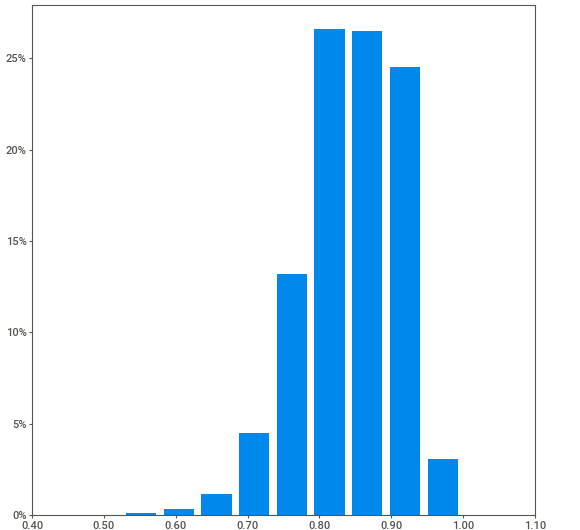
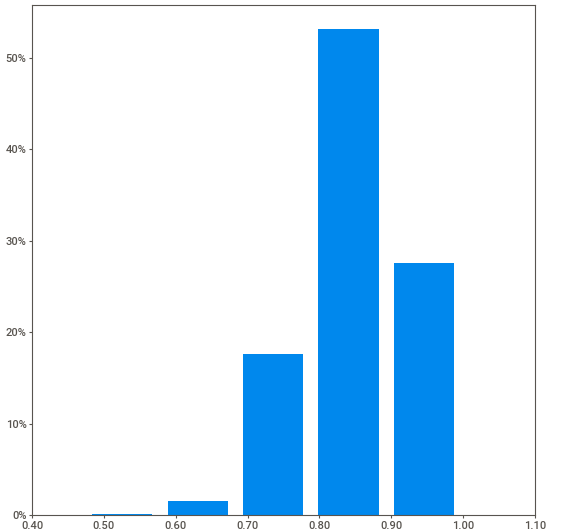
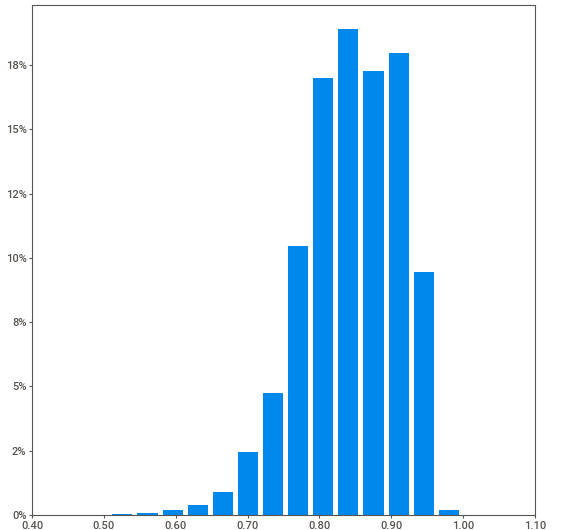
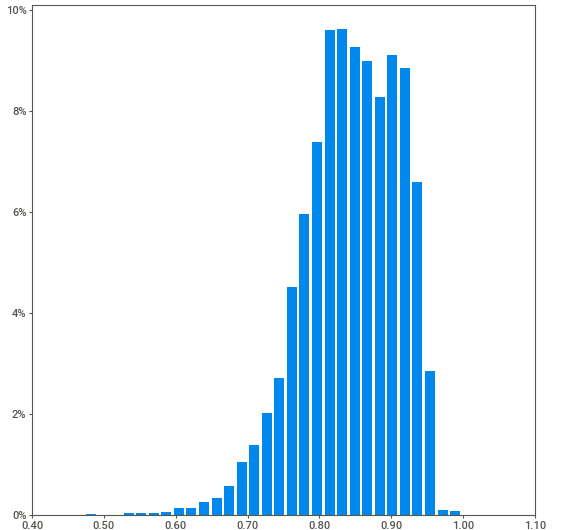
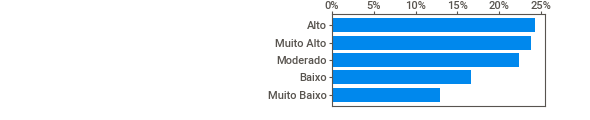
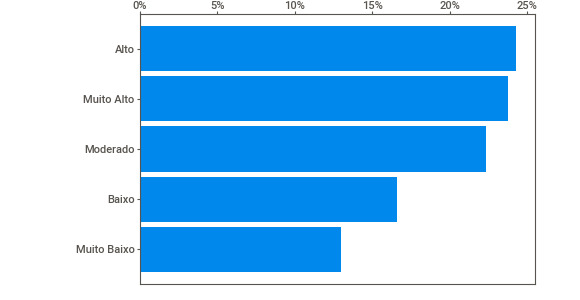
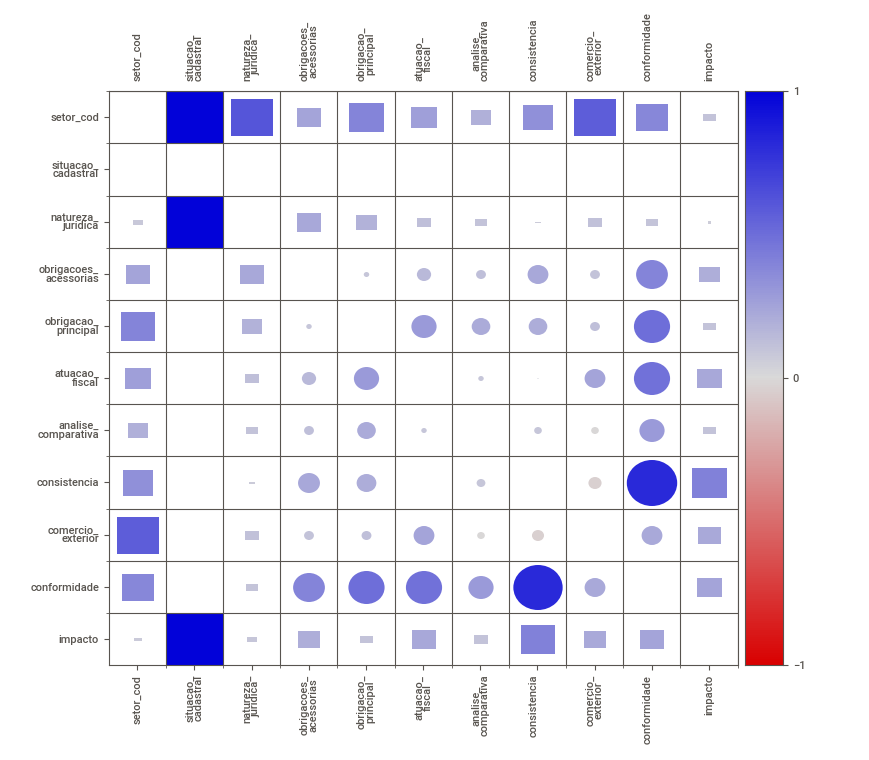
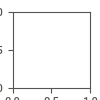

In [6]:
conf_report.show_notebook()

In [7]:
# Verificando duplicidade de linha
linha_duplicada_df = conf_df[conf_df.duplicated()]

In [8]:
print("Linha duplicada, exceto a primeira ocorrência com base em todas as colunas:")
print(linha_duplicada_df)

Linha duplicada, exceto a primeira ocorrência com base em todas as colunas:
     setor_cod cnae_classe situacao_cadastral       natureza_juridica  \
5697     11003       64620              Ativa  Entidades empresariais   

      obrigacoes_acessorias  obrigacao_principal  atuacao_fiscal  \
5697                 0.3636               1.0000          1.0000   

      analise_comparativa  consistencia  comercio_exterior  conformidade  \
5697               0.4444        0.8571             1.0000        0.8379   

          impacto  
5697  Muito Baixo  


In [9]:
# Removendo Colunas situacao_cadastral e natureza_juridica
conf_df = conf_df.drop(columns=['situacao_cadastral','natureza_juridica'])
display(conf_df.info())
display(conf_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8392 entries, 0 to 8391
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   setor_cod              8392 non-null   string 
 1   cnae_classe            8392 non-null   string 
 2   obrigacoes_acessorias  8392 non-null   float64
 3   obrigacao_principal    8392 non-null   float64
 4   atuacao_fiscal         8392 non-null   float64
 5   analise_comparativa    8392 non-null   float64
 6   consistencia           8392 non-null   float64
 7   comercio_exterior      8392 non-null   float64
 8   conformidade           8392 non-null   float64
 9   impacto                8392 non-null   string 
dtypes: float64(7), string(3)
memory usage: 655.8 KB


None

(8392, 10)

In [10]:
display(conf_df.head())

,setor_cod,cnae_classe,obrigacoes_acessorias,obrigacao_principal,atuacao_fiscal,analise_comparativa,consistencia,comercio_exterior,conformidade,impacto
0,01000,64221,0.8862,0.9575,0.9900,0.5106,0.9237,0.7857,0.8875,Muito Alto
1,01000,64221,0.9059,0.9717,1.0000,0.5556,0.9483,1.0000,0.9272,Muito Alto
2,01000,64930,0.9885,0.9975,1.0000,0.5203,0.6413,1.0000,0.8430,Muito Alto
3,08001,45307,1.0000,0.9286,1.0000,0.4536,0.8905,1.0000,0.9039,Moderado
4,08001,64620,1.0000,0.8800,0.9630,0.4444,0.9494,1.0000,0.9045,Muito Baixo


In [11]:
# Salvar o novo dataset após o tratamento realizado nesta etapa
conf_df.to_csv('tcc_conformidade_3.csv', index=False)